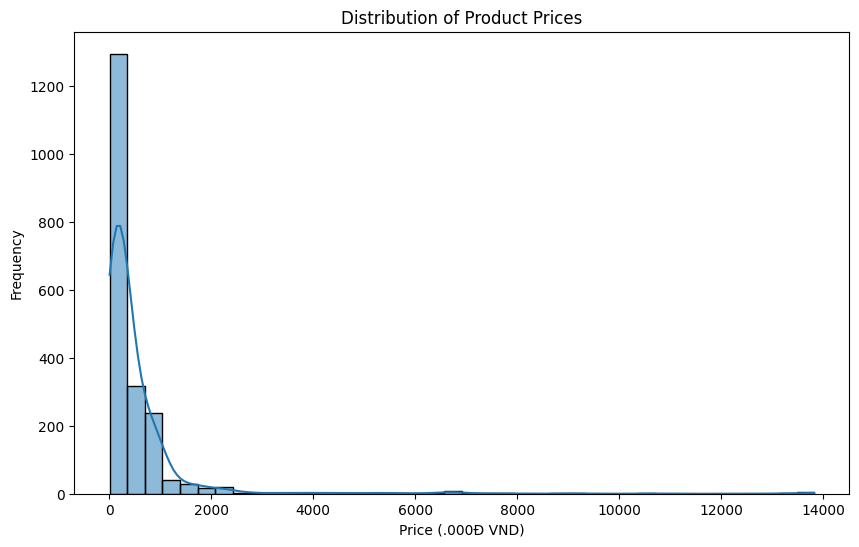

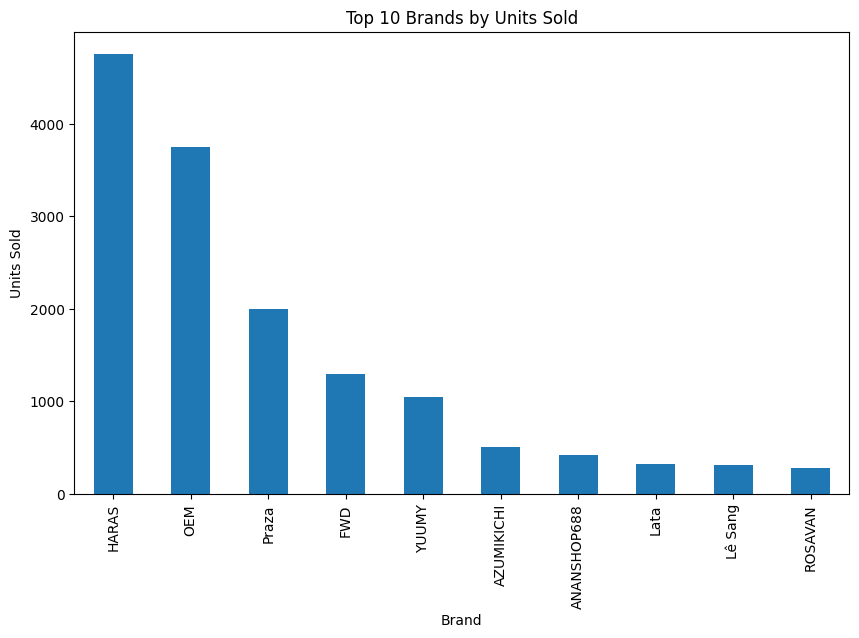

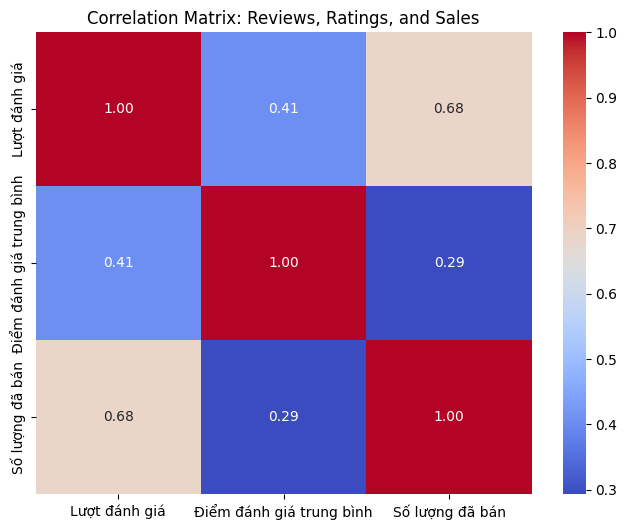

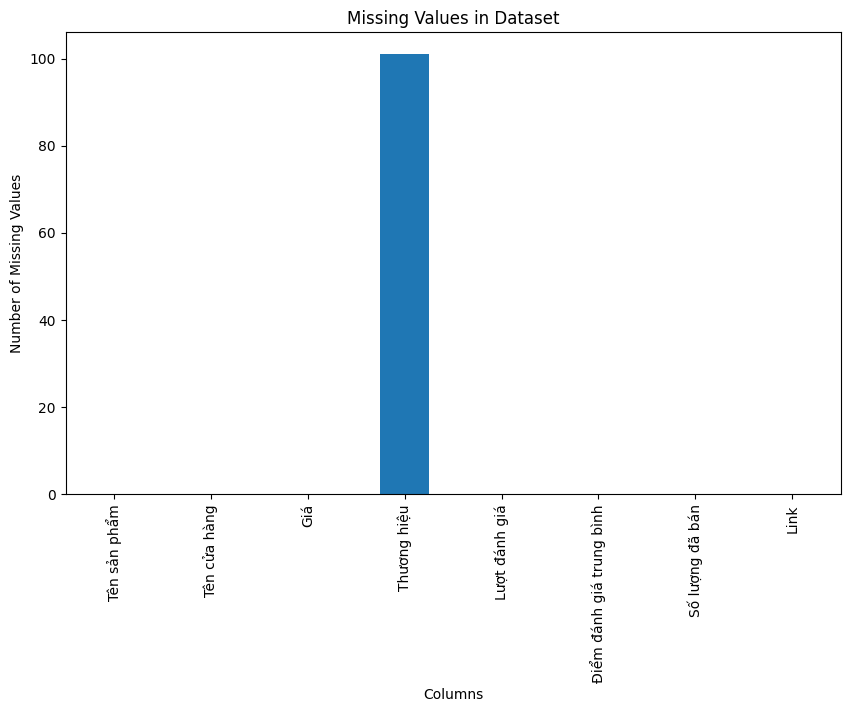

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path = "./Data/tiki_products.csv"

""" 
Visualization tools were used to analyze patterns:
    - Distribution of product Giás.
    - Sales trends for different brands.
    - Reviews and ratings correlation with sales. 
    - Missing values in the dataset.
Tên sản phẩm	Tên cửa hàng	Giá	Thương hiệu	Lượt đánh giá	Điểm đánh giá trung bình	Số lượng đã bán	Link
"""
# Reload the dataset using the correct delimiter
data = pd.read_csv(path, delimiter='\t')

# Display the first few rows to confirm successful loading
data.head()

# Handle missing values
missing_values = data.isnull().sum()

# 1. Distribution of product prices
# Removing 3 last 0s from the price
data['Giá'] = data['Giá'].apply(lambda x: x / 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data['Giá'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (.000Đ VND)')
plt.ylabel('Frequency')
plt.show()

# 2. Sales trends for different brands (top 10 brands by units sold)
brand_sales = data.groupby('Thương hiệu')['Số lượng đã bán'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
brand_sales.plot(kind='bar')
plt.title('Top 10 Brands by Units Sold')
plt.xlabel('Brand')
plt.ylabel('Units Sold')
plt.show()

# 3. Correlation between reviews, ratings, and sales
correlation_matrix = data[['Lượt đánh giá', 'Điểm đánh giá trung bình', 'Số lượng đã bán']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Reviews, Ratings, and Sales')
plt.show()

# 4. Visualization of missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()